# Prediction Pima  

## Preparing Data
<br>
chapter 5

http://bit.ly/ml_python
<Br>
https://github.com/JerryKurata/MachineLearningWithPython

Predicting Daibets

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
pima_data = pd.read_csv('./data/pima-data.csv')
print(pima_data.shape)
pima_data.head()

(768, 10)


num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  diab_pred  \
0         6           148            72         35        0  33.6      0.627   
1         1            85            66         29        0  26.6      0.351   
2         8           183            64          0        0  23.3      0.672   
3         1            89            66         23       94  28.1      0.167   
4         0           137            40         35      168  43.1      2.288   

   age    skin  diabetes  
0   50  1.3790      True  
1   31  1.1426     False  
2   32  0.0000      True  
3   21  0.9062     False  
4   33  1.3790      True

In [9]:
pima_data.dtypes

num_preg          int64
glucose_conc      int64
diastolic_bp      int64
thickness         int64
insulin           int64
bmi             float64
diab_pred       float64
age               int64
skin            float64
diabetes           bool
dtype: object

In [15]:
pima_data.isnull().values.any()

False

In [16]:
pima_data.isnull().any()

num_preg        False
glucose_conc    False
diastolic_bp    False
thickness       False
insulin         False
bmi             False
diab_pred       False
age             False
skin            False
diabetes        False
dtype: bool

In [17]:
def plot_corr(df, size):
    
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

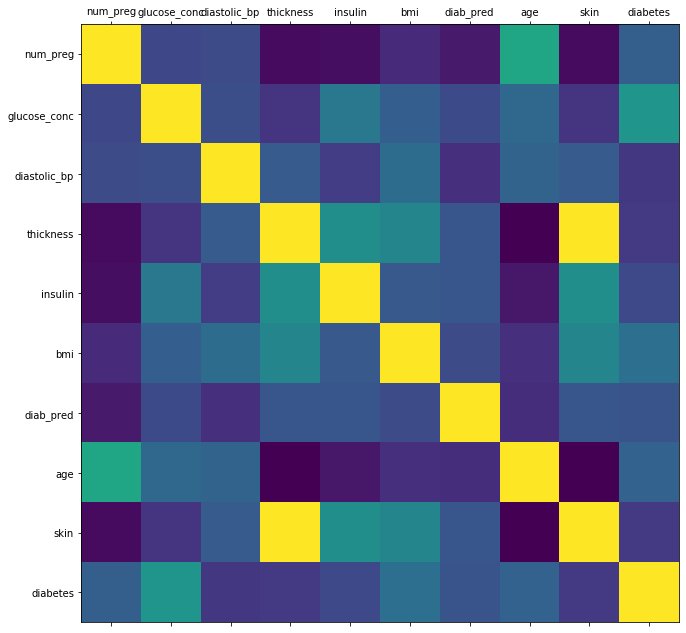

In [18]:
plot_corr(pima_data, 11)

In [19]:
pima_data.corr()

num_preg  glucose_conc  diastolic_bp  thickness   insulin  \
num_preg      1.000000      0.129459      0.141282  -0.081672 -0.073535   
glucose_conc  0.129459      1.000000      0.152590   0.057328  0.331357   
diastolic_bp  0.141282      0.152590      1.000000   0.207371  0.088933   
thickness    -0.081672      0.057328      0.207371   1.000000  0.436783   
insulin      -0.073535      0.331357      0.088933   0.436783  1.000000   
bmi           0.017683      0.221071      0.281805   0.392573  0.197859   
diab_pred    -0.033523      0.137337      0.041265   0.183928  0.185071   
age           0.544341      0.263514      0.239528  -0.113970 -0.042163   
skin         -0.081672      0.057328      0.207371   1.000000  0.436783   
diabetes      0.221898      0.466581      0.065068   0.074752  0.130548   

                   bmi  diab_pred       age      skin  diabetes  
num_preg      0.017683  -0.033523  0.544341 -0.081672  0.221898  
glucose_conc  0.221071   0.137337  0.263514  0.057328  0.466581  
diastolic_bp  0.281805   0.041265  0.239528  0.207371  0.065068  
thickness     0.392573   0.183928 -0.113970  1.000000  0.074752  
insulin       0.197859   0.185071 -0.042163  0.436783  0.130548  
bmi           1.000000   0.140647  0.036242  0.392573  0.292695  
diab_pred     0.140647   1.000000  0.033561  0.183928  0.173844  
age           0.036242   0.033561  1.000000 -0.113970  0.238356  
skin          0.392573   0.183928 -0.113970  1.000000  0.074752  
diabetes      0.292695   0.173844  0.238356  0.074752  1.000000

In [21]:
del pima_data['skin']

In [22]:
pima_data.head()

num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  diab_pred  \
0         6           148            72         35        0  33.6      0.627   
1         1            85            66         29        0  26.6      0.351   
2         8           183            64          0        0  23.3      0.672   
3         1            89            66         23       94  28.1      0.167   
4         0           137            40         35      168  43.1      2.288   

   age  diabetes  
0   50      True  
1   31     False  
2   32      True  
3   21     False  
4   33      True

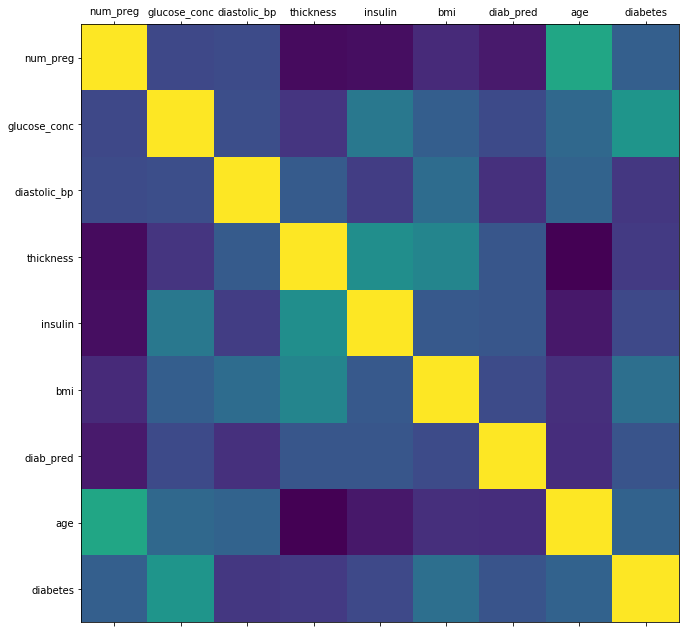

In [23]:
plot_corr(pima_data, 11)

In [24]:
#molding data

In [26]:
pima_data.dtypes

num_preg          int64
glucose_conc      int64
diastolic_bp      int64
thickness         int64
insulin           int64
bmi             float64
diab_pred       float64
age               int64
diabetes           bool
dtype: object

In [28]:
# change True to 1, False to 0

In [29]:
diabetes_map= {True :1, False: 0}
pima_data['diabetes'] = pima_data['diabetes'].map(diabetes_map)

In [30]:
pima_data.dtypes

num_preg          int64
glucose_conc      int64
diastolic_bp      int64
thickness         int64
insulin           int64
bmi             float64
diab_pred       float64
age               int64
diabetes          int64
dtype: object

In [31]:
len(pima_data)

768

In [32]:
num_true = len(pima_data.loc[pima_data['diabetes'] == True])
num_false = len(pima_data.loc[pima_data['diabetes'] == False])

In [36]:
print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) *100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) *100))


Number of True cases: 268 (34.90%)
Number of False cases: 500 (65.10%)


## Selection algorithm
<br>
chapter 6

### spliting data
70% training, 30% testing

In [38]:
from sklearn.model_selection import train_test_split

In [44]:
feature_col_names = ['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age']
predicted_class_names = ['diabetes']

In [45]:
X = pima_data[feature_col_names].values
Y = pima_data['diabetes'].values

X_train, x_test, Y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [47]:
print("original true: {0} ({1:0.2f}%)".format(len(pima_data.loc[pima_data['diabetes'] == 1]), len(pima_data.loc[pima_data['diabetes'] == 1])/len(pima_data)))

original true: 268 (0.35%)


In [50]:
print("training true: {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 1]), len(Y_train[Y_train[:] == 1])/len(Y_train)))
print("testing true: {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), len(y_test[y_test[:] == 1])/len(y_test)))

training true: 188 (0.35%)
testing true: 80 (0.35%)


### Post split Data preparation

In [51]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


### imputing with mean


In [55]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values =0, strategy='mean')

In [57]:
X_train = imputer.fit_transform(X_train)
x_test = imputer.fit_transform(x_test)

### training initial algorithm -Naive Bayes


In [58]:
from sklearn.naive_bayes import GaussianNB

In [60]:
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [64]:
y_predict = nb_model.predict(X_train)

from sklearn import metrics

print(metrics.accuracy_score(Y_train, y_predict))

0.7541899441340782


In [72]:
nb_predict_test = nb_model.predict(x_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.7359


### Metrics 

In [70]:
# training metrics
print("nb_predict_test", nb_predict_test)
print ("y_test", y_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

nb_predict_test [0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 0]
y_test [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 0 1 1 0 0 0]
Accuracy: 0.7359


In [71]:
print("Confusion matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print(" ")
print("Classificatio Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion matrix
[[118  33]
 [ 28  52]]
 
Classificatio Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



### Random Forest 

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, Y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

predict traing data


In [79]:
#overfitting accuracy =1 !!
y_predict_train = rf_model.predict(X_train)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_predict_train, Y_train)))

Accuracy: 1.0000


In [77]:
rf_predict_test = rf_model.predict(x_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(rf_predict_test, y_test)))

Accuracy: 0.7403


In [78]:
print("Confusion matrix")
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
print(" ")
print("Classificatio Report")
print(metrics.classification_report(y_test, rf_predict_test))

Confusion matrix
[[119  32]
 [ 28  52]]
 
Classificatio Report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



Regularization Hyperparameter to prevent overfitting

and Cross validation (later)

and Bias-variance trade-off

### Logistic Regression 

In [85]:
from sklearn.linear_model import LogisticRegression

In [91]:
logistic_model = LogisticRegression(max_iter=1000, C=0.7, random_state=42)
logistic_model.fit(X_train, Y_train.ravel())
logistic_predict_test = logistic_model.predict(x_test)

In [92]:
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, logistic_predict_test)))
print(metrics.confusion_matrix(y_test, logistic_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, logistic_predict_test))

Accuracy: 0.7359
[[123  28]
 [ 33  47]]

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



0.5875 0.1


Text(0, 0.5, 'recall score')

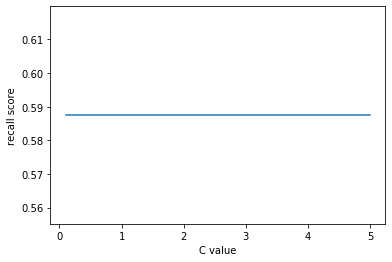

In [97]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [],[]

C_val = C_start
best_recall_score = 0
while(C_val < C_end):
    C_values.append(C_val)
    logistic_model_loop = LogisticRegression(C=C_val, max_iter=1000, random_state=42)
    logistic_model_loop.fit(X_train, Y_train.ravel())
    logistic_predict_loop_test = logistic_model_loop.predict(x_test)
    recall_score = metrics.recall_score(y_test, logistic_predict_loop_test)
    recall_scores.append(recall_score)
    
    if(recall_score > best_recall_score):
        best_recall_score = recall_score
        best_logistic_predict_test = logistic_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print(best_recall_score, best_score_C_val)

plt.plot(C_values, recall_scores, '-')
plt.xlabel('C value')
plt.ylabel('recall score')

In [106]:
from sklearn.linear_model import LogisticRegression
lr_model =LogisticRegression( class_weight="balanced", C=0.3, random_state=42, solver='liblinear')
lr_model.fit(X_train, Y_train.ravel())
lr_predict_test = lr_model.predict(x_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.7143
[[106  45]
 [ 21  59]]

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       151
           1       0.57      0.74      0.64        80

    accuracy                           0.71       231
   macro avg       0.70      0.72      0.70       231
weighted avg       0.74      0.71      0.72       231

0.7375


### Cross Validation (CV)

### LogisticRegressionCV 

In [107]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced", max_iter=500)  # set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(X_train, Y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=500, multi_class='auto', n_jobs=-1, penalty='l2',
                     random_state=42, refit=False, scoring=None, solver='lbfgs',
                     tol=0.0001, verbose=0)

In [108]:
lr_cv_predict_test = lr_cv_model.predict(x_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Accuracy: 0.7013
[[109  42]
 [ 27  53]]

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       151
           1       0.56      0.66      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.70      0.71       231



### Using your trained Model¶
